<a href="https://colab.research.google.com/github/pushkar63/DeepL/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [0]:
from fastai import *
from fastai.vision import *


In [2]:
path = untar_data(URLs.MNIST)

In [3]:
path

PosixPath('/root/.fastai/data/mnist_png')

In [4]:
path.ls()

[PosixPath('/root/.fastai/data/mnist_png/testing'),
 PosixPath('/root/.fastai/data/mnist_png/training')]

In [9]:
path_fold = path/'testing'; path_fold

PosixPath('/root/.fastai/data/mnist_png/testing')

In [10]:
path_fold.ls()

[PosixPath('/root/.fastai/data/mnist_png/testing/0'),
 PosixPath('/root/.fastai/data/mnist_png/testing/1'),
 PosixPath('/root/.fastai/data/mnist_png/testing/5'),
 PosixPath('/root/.fastai/data/mnist_png/testing/4'),
 PosixPath('/root/.fastai/data/mnist_png/testing/8'),
 PosixPath('/root/.fastai/data/mnist_png/testing/3'),
 PosixPath('/root/.fastai/data/mnist_png/testing/7'),
 PosixPath('/root/.fastai/data/mnist_png/testing/2'),
 PosixPath('/root/.fastai/data/mnist_png/testing/6'),
 PosixPath('/root/.fastai/data/mnist_png/testing/9')]

In [19]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=False), train='training', valid='testing',size=32)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (60000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
0,0,0,0,0
Path: /root/.fastai/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
0,0,0,0,0
Path: /root/.fastai/data/mnist_png;

Test: None

In [20]:
data.classes

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

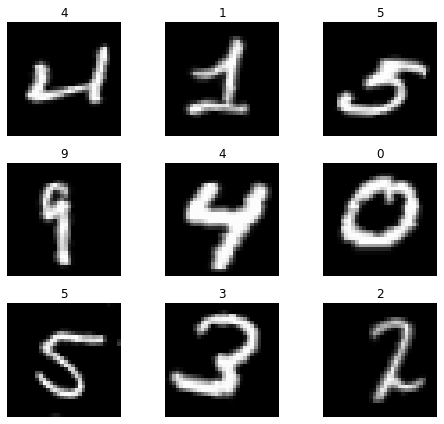

In [21]:
data.show_batch(3, figsize=(7,6))

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [27]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.657189,0.346985,0.894000,02:19
1,0.267434,0.118840,0.960200,02:17
2,0.180140,0.078604,0.973100,02:16
3,0.160630,0.069579,0.976600,02:16


In [0]:
learn.save('stage-1')

In [29]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


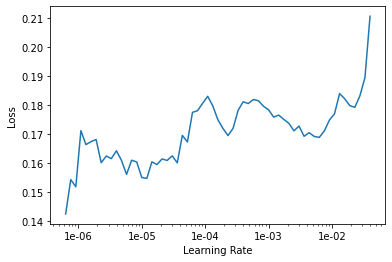

In [30]:
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [32]:
learn.fit_one_cycle(2, max_lr=slice(1e-3, 4e-1))

epoch,train_loss,valid_loss,accuracy,time
0,12.079720,1.708258,0.980600,02:27
1,0.362143,39.128220,0.993000,02:27
